In [1]:
from __future__ import print_function
import numpy as np
from vega import VegaLite as canvas
import histbook as hb

In [2]:
ptHist = hb.Hist(
    hb.groupby("type"),
    hb.bin("pt", 50, 0, 250),
    weight="w",
)

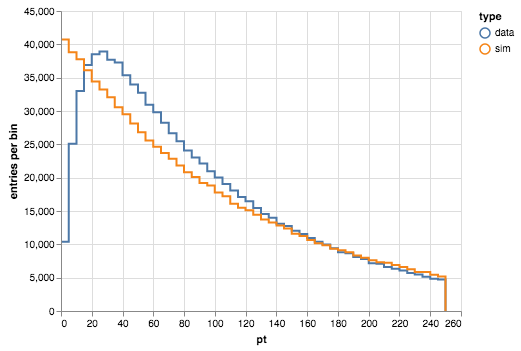

In [3]:
# strawman distributions
nevent = int(1e6)
data_pt = -np.log(np.random.uniform(size=nevent))*100-np.log(np.random.uniform(size=nevent))*10
ptHist.fill(type="data", pt=data_pt, w=np.ones(nevent))

sim_pt = -np.log(np.random.uniform(size=nevent))*120
sim_weight = np.ones(nevent)
ptHist.fill(type="sim", pt=sim_pt, w=sim_weight)

ptHist.overlay("type").step("pt", width=400, height=300).to(canvas)

In [5]:
# calculate a binned scale factor
binning_pt = np.array([0., 10., 20., 30., 50., 80., 100., 120., 150., 200., np.inf])
numerator = np.histogram(data_pt, bins=binning_pt)[0]*1.  # np.histogram returns integers
denominator = np.histogram(sim_pt, bins=binning_pt)[0]*1.
pt_correction = np.zeros_like(numerator)
nonzero_denom = np.where(denominator>0.)
pt_correction[nonzero_denom] = numerator[nonzero_denom]/denominator[nonzero_denom] \
    * np.sum(denominator)/np.sum(numerator)

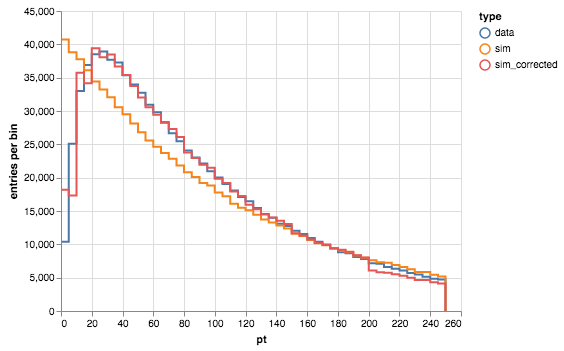

In [6]:
# derive weights vector and include it in the event weight
sim_weight *= pt_correction[np.searchsorted(binning_pt, sim_pt, side='right')-1]
ptHist.fill(type="sim_corrected", pt=sim_pt, w=sim_weight)

ptHist.overlay("type").step("pt", width=400, height=300).to(canvas)